In [8]:
from pydub import AudioSegment
from pydub.silence import split_on_silence, detect_silence
import IPython.display
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [3]:
filename = '20180803.mp3'

In [6]:
IPython.display.Audio(filename)

In [2]:
wave, sr = librosa.load("20180803.mp3", mono=True)

/Users/coffee/opt/anaconda3/lib/python3.7/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


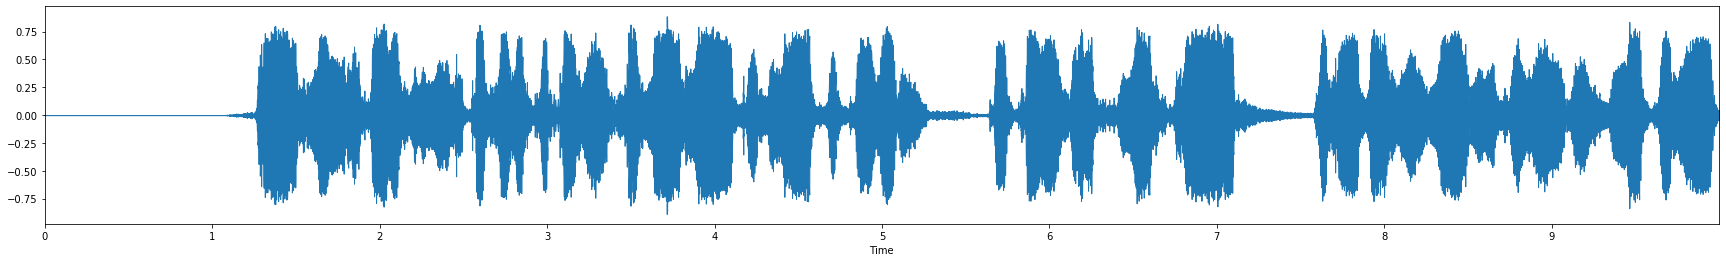

In [32]:
plt.figure(figsize=(30,4))
librosa.display.waveplot(wave[:10*sr], sr = sr)

In [21]:
wave

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [25]:
chunks = librosa.effects.split(wave)

In [26]:
chunks

array([[  23552, 2501120]])

In [31]:
wave[2501120]

-2.730469e-05

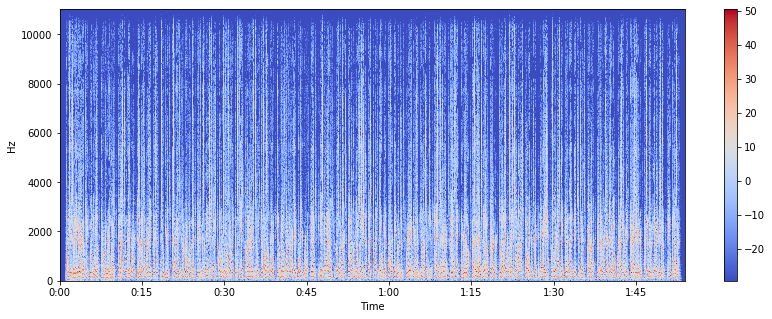

In [33]:
X = librosa.stft(wave)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

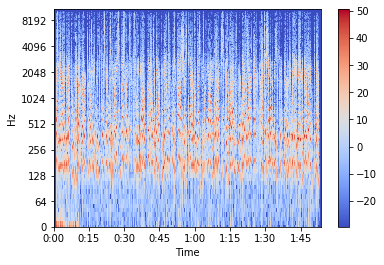

In [34]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

In [ ]:
sound = AudioSegment.from_file("20180803.mp3", format='mp3')

chunks = detect_silence(sound, min_silence_len=1000, silence_thresh=-26)
print(chunks)

for s,e in chunks:
    sub = sound[s:e]
    sub.export('chunks/sub1.mp3', format='mp3')